Model of a generalized Josephson Junction Array

Authors: Cliff Sun, Harshvardhan, Alexey Bezryadin

In [1733]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

In [ ]:
arrayOfJunctions = [0, 1]

print(arrayOfJunctions)

In [1741]:
def current(B, arrJ, arrC, y):
    curr = 0
    limit = int(len(arrJ) / 2)
    for n in range(limit):
        numOfSegments = 5 if (arrJ[2 * n + 1] - arrJ[2 * n]) < 0.05 else int(100 * (arrJ[2 * n + 1] - arrJ[2 * n]))
        sizeOfSegment = float((arrJ[2 * n + 1] - arrJ[2 * n]) / numOfSegments)
        for i in range(numOfSegments):
            curr += arrC[n] * np.sin(y + (2 * np.pi * B) * (arrJ[2 * n] + i * sizeOfSegment)) * (1/numOfSegments)
    return curr

def criticalCurrent(density, arrJ):
    criticalCurrents = []
    junctionWidths = []
    for i in range(len(arrJ)//2):
        junctionWidths.append(arrJ[2*i+1] - arrJ[2*i])
    for i in range (len(junctionWidths)):
        criticalCurrents.append(junctionWidths[i] * density[i])
    return criticalCurrents

def maxCurrent(B, arrayJ, arrayC):
    Y=np.linspace(0, 2*np.pi, 150)
    dummyArray=[]
    for gamma in Y:
        dummyArray.append(current(B, arrayJ, arrayC, gamma))
    return max(dummyArray)

def IMaxPoint(arrayOfJunctions, MagField):
    I_c = []
    criticalCurrents = criticalCurrent(np.ones(len(arrayOfJunctions)//2), arrayOfJunctions)
    for B in MagField:
        I_c.append(maxCurrent(B=B, arrayJ=arrayOfJunctions, arrayC=criticalCurrents) / np.sum(criticalCurrents))
    return I_c

The 2 lines below is where the useful section of the code is for modeling a SQUID

In [1744]:
MagField = np.linspace(-10, 10, 1000)

In [1745]:
criticalCurrent = IMaxPoint(arrayOfJunctions=arrayOfJunctions, MagField=MagField)

The 2 lines above is where the useful section of the code is for modeling a SQUID

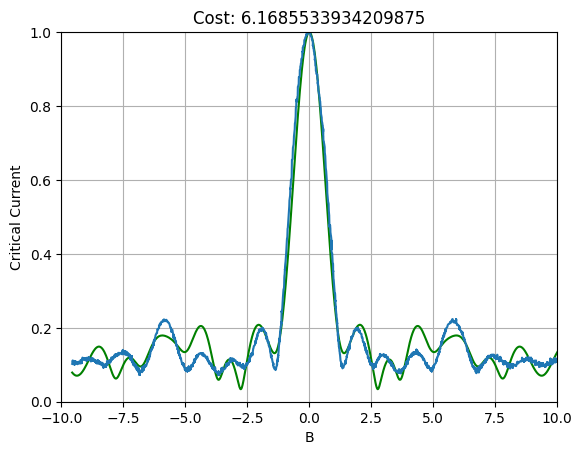

In [1747]:
plt.plot(MagField, criticalCurrent, 'g-')
plt.xlabel('B')
plt.ylabel('Critical Current')
plt.ylim(0,1) 
plt.xlim(-10,10)
plt.grid()            
plt.show()